## Observations and Insights 

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [206]:
# Checking the number of mice.
numbermice=merge_df['Mouse ID'].nunique()
print("Number of mice=",numbermice)

Number of mice= 249


In [207]:
#unique 
sindup=merge_df.groupby(['Mouse ID', 'Timepoint']).ngroups

In [208]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_df=merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')
duplicate_df=merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep='first')]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [209]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newdata=merge_df.drop(merge_df.index[[909,911,913,915,917]])
newdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [210]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
numbermice=merge_df['Mouse ID'].nunique()
print("Number of mice=",numbermice)

Number of mice= 249


In [211]:
# Checking the number of mice.
numberregimen=merge_df['Drug Regimen'].unique()
print("Number of regimen=",numberregimen)

Number of regimen= ['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


## Summary Statistics

In [212]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
for regimen in numberregimen:
    regimendata=newdata[newdata['Drug Regimen']==regimen]
    estadisticas=regimendata[["Tumor Volume (mm3)"]].describe()
    print(regimen,"\n",estadisticas)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Ramicane 
        Tumor Volume (mm3)
count          228.000000
mean            40.216745
std              4.846308
min             22.050126
25%             36.674635
50%             40.673236
75%             45.000000
max             47.622816
Capomulin 
        Tumor Volume (mm3)
count          230.000000
mean            40.675741
std              4.994774
min             23.343598
25%             37.685933
50%             41.557809
75%             45.000000
max             48.158209
Infubinol 
        Tumor Volume (mm3)
count          178.000000
mean            52.884795
std              6.567243
min             36.321346
25%             47.312353
50%             51.820584
75%             57.314444
max             72.226731
Placebo 
        Tumor Volume (mm3)
count          181.000000
mean            54.033581
std              7.821003
min             45.000000
25%             47.459053
50%             52.288934
75%             59.916934
max             73.212939
Ceftamin 
        T

In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
daraesta = pd.DataFrame(columns = ['DRUG REGIMEN','MEAN','VAR','STD DEV','SEM']) 
daraesta
a=0
for regimen in numberregimen:
    renglon=[]
    regimendata=newdata[newdata['Drug Regimen']==regimen]
    renglon.append(regimen)
    renglon.append(regimendata["Tumor Volume (mm3)"].mean())
    renglon.append(regimendata["Tumor Volume (mm3)"].var())
    renglon.append(regimendata["Tumor Volume (mm3)"].std())
    renglon.append(regimendata["Tumor Volume (mm3)"].sem())
    daraesta.loc[a]=(renglon)
    a=a+1
daraesta.set_index('DRUG REGIMEN')


,MEAN,VAR,STD DEV,SEM
DRUG REGIMEN,,,,
Ramicane,40.216745,23.486704,4.846308,0.320955
Capomulin,40.675741,24.947764,4.994774,0.329346
Infubinol,52.884795,43.128684,6.567243,0.492236
Placebo,54.033581,61.168083,7.821003,0.581331
Ceftamin,52.591172,39.290177,6.268188,0.469821
Stelasyn,54.233149,59.450562,7.710419,0.573111
Zoniferol,53.236507,48.533355,6.966589,0.516398
Ketapril,55.235638,68.553577,8.279709,0.603860
Propriva,52.393463,43.138803,6.568014,0.525862


In [214]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
prom=newdata[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
vari=newdata[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
estan=newdata[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
sems=newdata[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
df_esta = pd.merge(prom, vari, on="Drug Regimen")
df_esta = pd.merge(df_esta, estan, on="Drug Regimen")
df_esta = pd.merge(df_esta, sems, on="Drug Regimen")
df_esta.columns =['MEAN','VAR','STD DEV','SEM'] 
df_esta

,MEAN,VAR,STD DEV,SEM
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Stadistics')

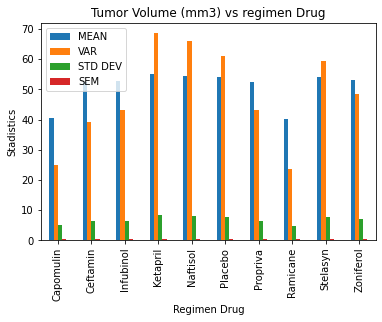

In [215]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
df_esta.plot(kind="bar")
plt.title("Tumor Volume (mm3) vs regimen Drug")
plt.xlabel("Regimen Drug")
plt.ylabel("Stadistics")

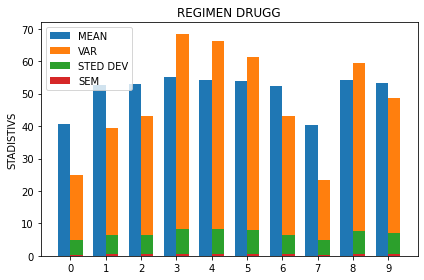

In [216]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x = np.arange(df_esta.shape[0])  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_esta["MEAN"], width, label='MEAN')
rects2 = ax.bar(x + width/2, df_esta["VAR"], width, label='VAR')
rects3 = ax.bar(x + width/2, df_esta["STD DEV"], width, label='STED DEV')
rects4 = ax.bar(x + width/2, df_esta["SEM"], width, label='SEM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('STADISTIVS')
ax.set_title('REGIMEN DRUGG')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()

Sex
Female    930
Male      958
dtype: int64

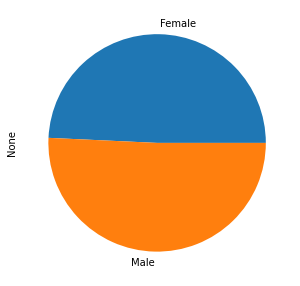

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tablase=newdata.groupby(["Sex"]).size()
tablase.plot.pie(y='mass', figsize=(5, 5))
tablase

In [218]:
tablase=pd.DataFrame(newdata.groupby(["Sex"]).size())
tablase.columns=['count'] 
tablase

,count
Sex,
Female,930
Male,958


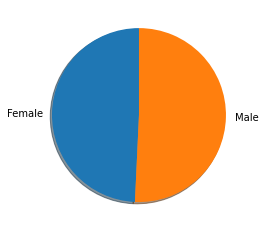

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0,0)
labels=tablase.index
xi=tablase['count']
fig1, ax1 = plt.subplots()
ax1.pie(xi, explode=explode, labels=labels, shadow=True, startangle=90)
plt.show()


## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimenmuestra=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for regimen in regimenmuestra:
    regimendata=newdata[newdata['Drug Regimen']==regimen]
    regimendatacort=regimendata.sort_values(by='Timepoint', ascending=False)
    regimnedu=regimendatacort.drop_duplicates(subset=['Mouse ID'])
    regimendu=regimnedu[['Mouse ID','Timepoint',"Tumor Volume (mm3)"]]
    regimendu=regimendu.set_index('Mouse ID')
    print(regimen,"\n",regimendu)

Capomulin 
           Timepoint  Tumor Volume (mm3)
Mouse ID                               
r554             45           32.377357
w914             45           36.041047
g316             45           40.159220
m601             45           28.430964
u364             45           31.023923
g288             45           37.074024
r944             45           41.581521
b128             45           38.982878
s710             45           40.728578
y793             45           31.896238
x401             45           28.484033
i557             45           47.685963
v923             45           40.658124
l897             45           38.846876
j119             45           38.125164
l509             45           41.483008
m957             45           33.329098
i738             45           37.311846
s185             45           23.343598
b742             45           38.939633
t565             45           34.455298
j246             35           38.753265
f966             20         

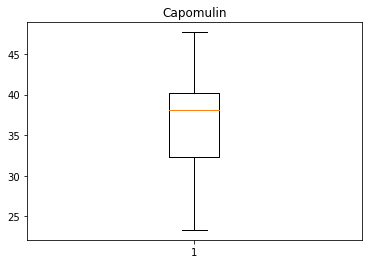

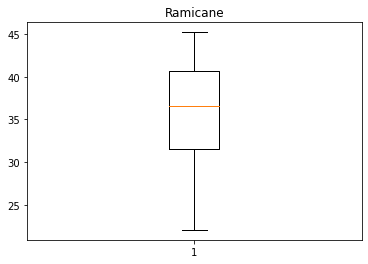

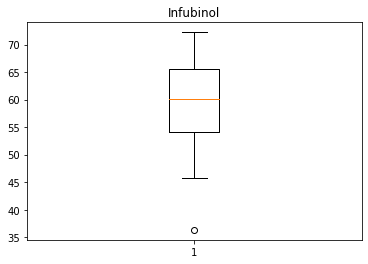

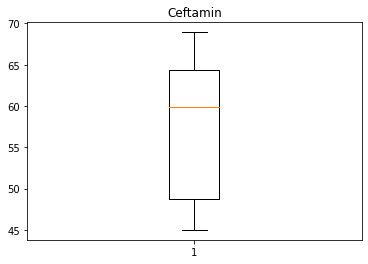

In [221]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumorvol=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimenmuestra=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
for regimen in regimenmuestra:
    regimendata=newdata[newdata['Drug Regimen']==regimen]
    regimendatacort=regimendata.sort_values(by='Timepoint', ascending=False)
    regimnedu=regimendatacort.drop_duplicates(subset=['Mouse ID'])
    regimendu=regimnedu[['Mouse ID','Timepoint',"Tumor Volume (mm3)"]]
    regimendu=regimendu.set_index('Mouse ID')
    data = regimnedu["Tumor Volume (mm3)"]
    fig, ax1 = plt.subplots()
    ax1.boxplot(data)
    ax1.set_title(regimen)

    # Locate the rows which contain mice on each drug and get the tumor volumes   
   # add subset     
    # Determine outliers using upper and lower bounds
    

In [222]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

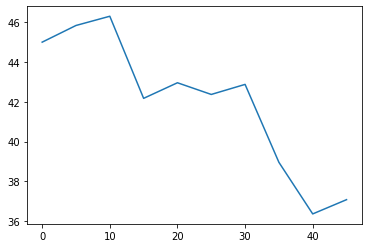

In [223]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
regimendata=newdata[newdata['Drug Regimen']=="Capomulin"]
regimendata=newdata[newdata['Mouse ID']=="g288"]
regimendatacort=regimendata.sort_values(by='Timepoint', ascending=True)
regimendu=regimendatacort[['Mouse ID','Timepoint',"Tumor Volume (mm3)"]]
regimendu=regimendu.set_index('Mouse ID')
plt.plot(regimendu['Timepoint'],regimendu['Tumor Volume (mm3)'])
plt.show()

Text(6, 10, 'y = 0.89x + 22.76')

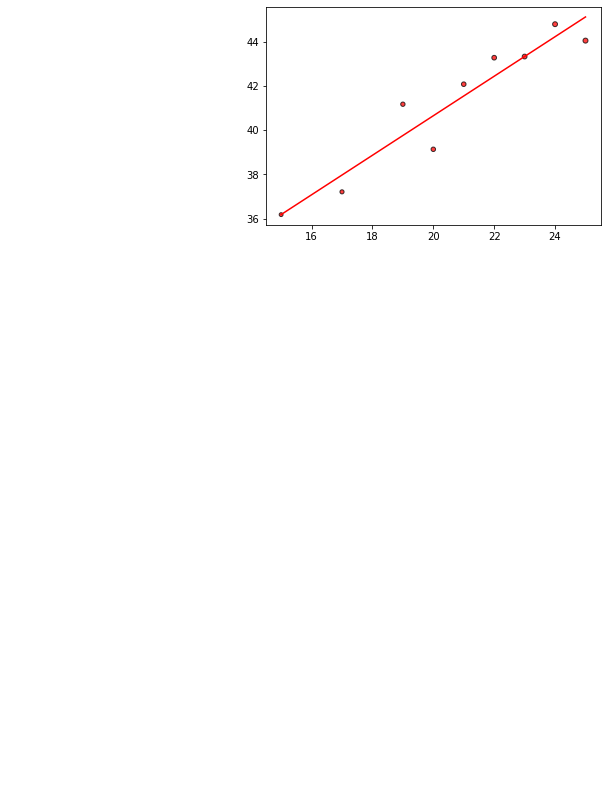

In [226]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimendata=newdata[newdata['Drug Regimen']=="Capomulin"]
regimendatacort=regimendata.sort_values(by='Timepoint', ascending=True)
regimendu=regimendatacort[['Mouse ID','Weight (g)',"Tumor Volume (mm3)"]]
regimendu=regimendu.set_index('Mouse ID')
regimendu=regimendu.groupby(by=['Weight (g)']).mean()
regimendu
(slope, intercept, rvalue, pvalue, stderr) = linregress(regimendu.index, regimendu['Tumor Volume (mm3)'])
regress_values = regimendu.index * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(regimendu.index, regimendu['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black",s=regimendu.index, alpha=0.75)
plt.plot(regimendu.index,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

## Correlation and Regression

In [203]:
# Calculate the correlation coefficient and linear regression model 
r = np.corrcoef(regimendu.index, regimendu['Tumor Volume (mm3)'])
r
# for mouse weight and average tumor volume for the Capomulin regimen


array([[1.       , 0.9505244],
       [0.9505244, 1.       ]])